In [123]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
% matplotlib inline


df = pd.read_csv('./data.csv', low_memory = False)
pd.set_option('display.max_columns', 0)


In [79]:
df.head()

,id,loan_amnt,term,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,fico_range_low,fico_range_high,last_credit_pull_d,last_fico_range_high,last_fico_range_low,acc_now_delinq,delinq_amnt,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,inq_last_6mths,inq_last_12m
0,88787390,30000,60 months,761.64,6 years,RENT,100100.0,Verified,Sep-2016,Current,debt_consolidation,SC,27.42,Jan-1976,690,694,Dec-2016,709,705,0,0,0,26.0,NaN,0,0.0
1,74722660,30000,60 months,692.93,10+ years,MORTGAGE,235000.0,Source Verified,Apr-2016,Current,home_improvement,PA,7.50,Jan-1995,670,674,Dec-2016,649,645,0,0,1,16.0,NaN,1,3.0
2,67919555,16000,60 months,379.39,6 years,RENT,84000.0,Not Verified,Jan-2016,Current,debt_consolidation,FL,27.87,Aug-1998,735,739,Dec-2016,739,735,0,0,0,80.0,NaN,0,2.0
3,54027458,14000,36 months,439.88,5 years,RENT,50000.0,Source Verified,Jul-2015,Fully Paid,debt_consolidation,WV,21.65,Oct-1996,725,729,Oct-2016,749,745,0,0,0,NaN,42.0,0,NaN
4,72594974,7500,36 months,252.67,3 years,MORTGAGE,68000.0,Not Verified,Feb-2016,Fully Paid,debt_consolidation,OH,29.09,Nov-2000,660,664,Dec-2016,709,705,0,0,0,NaN,NaN,2,5.0


In [80]:
df.describe() ## look for variables with minimal variance 

,id,loan_amnt,installment,annual_inc,dti,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low,acc_now_delinq,delinq_amnt,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,inq_last_6mths,inq_last_12m
count,8.000000e+04,80000.000000,80000.000000,8.000000e+04,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,41786.000000,14532.000000,80000.000000,37395.000000
mean,6.474229e+07,15055.793750,443.595158,7.778995e+04,19.446568,694.314000,698.314112,693.328225,686.068437,0.006488,16.692025,0.352275,33.964558,66.776356,0.565950,2.184009
std,1.488143e+07,8729.299624,255.693326,8.648673e+04,61.871127,30.744603,30.745156,58.631248,79.416694,0.084235,848.289643,0.942411,21.997469,25.205219,0.863342,2.473969
min,6.510400e+04,1000.000000,30.120000,0.000000e+00,0.000000,660.000000,664.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.389471e+07,8000.000000,258.100000,4.700000e+04,12.430000,670.000000,674.000000,669.000000,665.000000,0.000000,0.000000,0.000000,15.000000,50.000000,0.000000,0.000000
50%,6.571584e+07,13275.000000,382.500000,6.500000e+04,18.440000,685.000000,689.000000,699.000000,695.000000,0.000000,0.000000,0.000000,31.000000,68.000000,0.000000,1.000000
75%,7.612197e+07,20000.000000,585.080000,9.250000e+04,25.170000,710.000000,714.000000,729.000000,725.000000,0.000000,0.000000,0.000000,50.000000,83.000000,1.000000,3.000000
max,9.094516e+07,40000.000000,1536.950000,8.706582e+06,9999.000000,845.000000,850.000000,850.000000,845.000000,3.000000,110626.000000,39.000000,146.000000,119.000000,6.000000,36.000000


variable	Description
    id	A unique assigned ID for the loan listing.
    loan_amnt	The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
    
term	The number of payments on the loan. Values are in months and can be either 36 or 60.
    installment	The monthly payment owed by the borrower if the loan originates.
    emp_length	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
    home_ownership	The home ownership status provided by the borrower during registration_or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
    annual_inc	The self-reported annual income provided by the borrower during registration.
verification_status	Indicates if income was verified, not verified, or if the income source was verified
    issue_d	The month which the loan was funded
    loan_status	Current status of the loan
    purpose	A category provided by the borrower for the loan request. 
    
    addr_state	The state provided by the borrower in the loan application
    
    dti	A ratio calculated using the borroweres total monthly debt payments on the total debt obligations, excluding mortgage, divided by the borroweres self-reported monthly income.

earliest_cr_line	The month the borrower's earliest reported credit line was opened

fico_range_low	At the time of loan application, the lower boundary range the borrower's FICO at loan origination belongs to.

fico_range_high	At the time of loan application, the upper boundary range the borrower's FICO at loan origination belongs to.

acc_now_delinq	At the time of loan application, the number of accounts on which the borrower is now delinquent.

delinq_amnt	At the time of loan application, the past-due amount owed for the accounts on which the borrower is now delinquent.

delinq_2yrs	At the time of loan application, the number of 30+ days past-due incidences of delinquency in the 
borrower's credit file for the past 2 years

mths_since_last_delinq	At the time of loan application, the number of months since the borrower's last delinquency.
mths_since_last_record	At the time of loan application, the number of months since the last public record.
inq_last_6mths	At the time of loan application, the number of inquiries in past 6 months (excluding auto and mortgage inquiries)
inq_last_12m	At the time of loan application, number of credit inquiries in past 12 months
last_credit_pull_d	The most recent month LC pulled credit for this loan
last_fico_range_high	The upper boundary range the borrower's last FICO pulled belongs to.
last_fico_range_low	The lower boundary range the borrower's last FICO pulled belongs to.


In [81]:
df.columns[df.isnull().any()] ## are there missing columns? 

Index(['emp_length', 'last_credit_pull_d', 'mths_since_last_delinq',
       'mths_since_last_record', 'inq_last_12m'],
      dtype='object')

In [82]:
int(df.memory_usage(deep=False).sum() / 1000000) #MB

16

In [83]:
df.isnull().sum()/80000 
#%Missing data for each column.
#Not a lot can be done if missing data is beyond ~50% without introducing another bias into it.
## For now I will drop these columns an come back to it later 
## earliest_cr_line Older credit lines could be of interest if converted as a weight 


id                        0.000000
loan_amnt                 0.000000
term                      0.000000
installment               0.000000
emp_length                0.060862
home_ownership            0.000000
annual_inc                0.000000
verification_status       0.000000
issue_d                   0.000000
loan_status               0.000000
purpose                   0.000000
addr_state                0.000000
dti                       0.000000
earliest_cr_line          0.000000
fico_range_low            0.000000
fico_range_high           0.000000
last_credit_pull_d        0.000050
last_fico_range_high      0.000000
last_fico_range_low       0.000000
acc_now_delinq            0.000000
delinq_amnt               0.000000
delinq_2yrs               0.000000
mths_since_last_delinq    0.477675
mths_since_last_record    0.818350
inq_last_6mths            0.000000
inq_last_12m              0.532563
dtype: float64

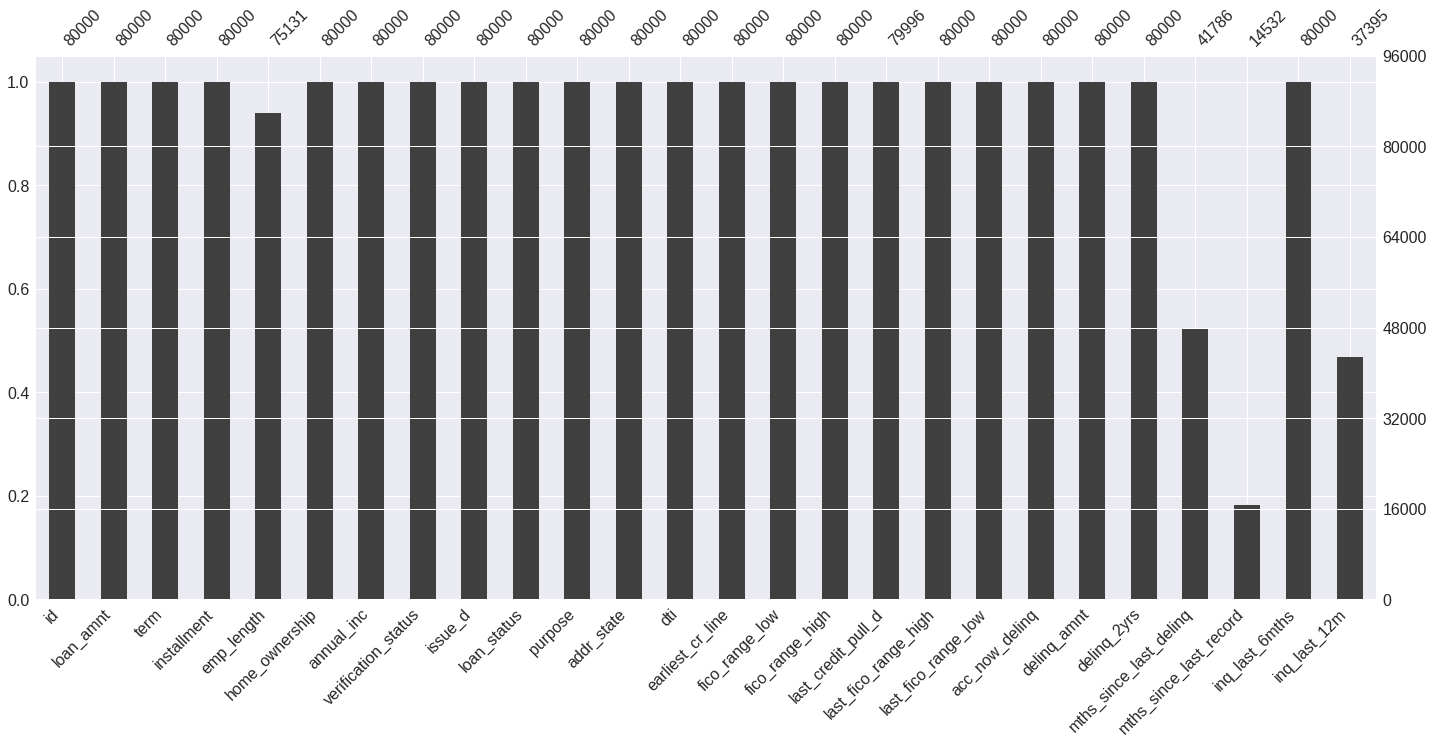

In [84]:
import missingno as msno

msno.bar(df)


In [85]:
## After going through the data dictionary and looking at the values in Data. Loan status appears to be our target variable. 
## http://help.bitbond.com/article/20-the-10-loan-status-variants-explained 
df['loan_status'].value_counts()
#Let's see how it is distributed. 
#Most of the loans look alright. Defaults is an under represented class. Since Current and Fully Paid are good loan types. 


Current       62429
Fully Paid    11534
Default        6037
Name: loan_status, dtype: int64

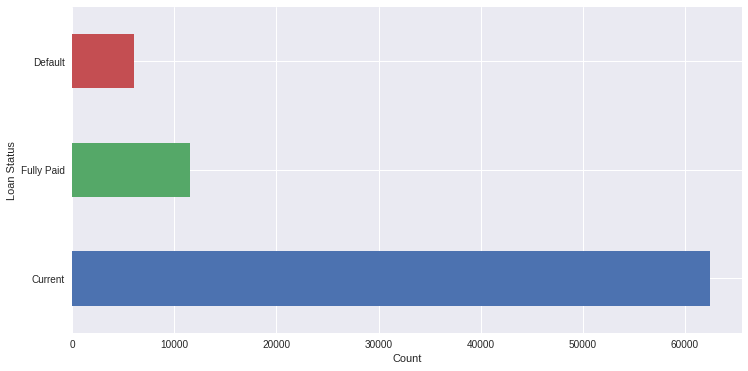

In [86]:
plt.figure(figsize= (12,6))
plt.ylabel('Loan Status')
plt.xlabel('Count')
df['loan_status'].value_counts().plot(kind = 'barh', grid = True)
plt.show()

In [87]:
len(df.installment.value_counts())

19569

In [88]:
df.head()

,id,loan_amnt,term,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,fico_range_low,fico_range_high,last_credit_pull_d,last_fico_range_high,last_fico_range_low,acc_now_delinq,delinq_amnt,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,inq_last_6mths,inq_last_12m
0,88787390,30000,60 months,761.64,6 years,RENT,100100.0,Verified,Sep-2016,Current,debt_consolidation,SC,27.42,Jan-1976,690,694,Dec-2016,709,705,0,0,0,26.0,NaN,0,0.0
1,74722660,30000,60 months,692.93,10+ years,MORTGAGE,235000.0,Source Verified,Apr-2016,Current,home_improvement,PA,7.50,Jan-1995,670,674,Dec-2016,649,645,0,0,1,16.0,NaN,1,3.0
2,67919555,16000,60 months,379.39,6 years,RENT,84000.0,Not Verified,Jan-2016,Current,debt_consolidation,FL,27.87,Aug-1998,735,739,Dec-2016,739,735,0,0,0,80.0,NaN,0,2.0
3,54027458,14000,36 months,439.88,5 years,RENT,50000.0,Source Verified,Jul-2015,Fully Paid,debt_consolidation,WV,21.65,Oct-1996,725,729,Oct-2016,749,745,0,0,0,NaN,42.0,0,NaN
4,72594974,7500,36 months,252.67,3 years,MORTGAGE,68000.0,Not Verified,Feb-2016,Fully Paid,debt_consolidation,OH,29.09,Nov-2000,660,664,Dec-2016,709,705,0,0,0,NaN,NaN,2,5.0


In [89]:
## Some Asumptions: 
## Issue month will not have a large effect on the loan status 
## Same goes for address state, purpose 

## Should visualize these against target variable

##'acc_now_delinq', Interesting description but virtually has no information, No one likes to report it?
## Interesting how 6000 defaulted accounts in data and still 
## delinq variables have 400~ values 


## 'delinq_amnt', 'delinq_2yrs' 'mths_since_last_delinq',
## 'mths_since_last_record', 'inq_last_6mths', 'inq_last_12m'
df.iloc[:,2:].T.apply(lambda x: x.nunique(), axis=1)

term                          2
installment               19569
emp_length                   11
home_ownership                4
annual_inc                 7243
verification_status           3
issue_d                      21
loan_status                   3
purpose                      13
addr_state                   50
dti                        4288
earliest_cr_line            629
fico_range_low               38
fico_range_high              38
last_credit_pull_d           25
last_fico_range_high         72
last_fico_range_low          71
acc_now_delinq                4
delinq_amnt                 312
delinq_2yrs                  21
mths_since_last_delinq      115
mths_since_last_record      120
inq_last_6mths                7
inq_last_12m                 32
dtype: int64

In [90]:
df.groupby('verification_status').size().sort_values()

verification_status
Verified           23349
Not Verified       23462
Source Verified    33189
dtype: int64

In [91]:
df['term'] = df['term'].str.split(' ').str[0]
df['emp_length'] = df['emp_length'].str.extract('(\d+)').astype(float)
df['emp_length'] = df['emp_length'].fillna(df.emp_length.median())
df['earliest_cr_line'] = df['earliest_cr_line'].str.split('-').str[1].astype(int) - min(df['earliest_cr_line'].str.split('-').str[1].astype(int))

/home/raz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [92]:
df.mths_since_last_delinq = df.mths_since_last_delinq.fillna(df.mths_since_last_delinq.median())
df.inq_last_12m = df.mths_since_last_delinq.fillna(df.inq_last_12m.median())

In [93]:
df.last_credit_pull_d.value_counts()

Dec-2016    71368
Oct-2016     2638
Nov-2016     1183
Aug-2016      695
Jul-2016      583
Apr-2016      488
Jun-2016      451
Sep-2016      433
Mar-2016      400
May-2016      389
Feb-2016      303
Jan-2016      227
Dec-2015      169
Nov-2015      127
Oct-2015      120
Sep-2015      106
Aug-2015       91
Jul-2015       79
Jun-2015       43
Apr-2015       31
May-2015       29
Mar-2015       24
Feb-2015       12
Jan-2015        5
Dec-2014        2
Name: last_credit_pull_d, dtype: int64

In [94]:
df['last_credit_pull_d'] = df['last_credit_pull_d'].fillna("2016-12-01")

In [95]:
to_del =  ['id',"mths_since_last_record" ,"acc_now_delinq","addr_state","purpose"]
df.drop(to_del, inplace=True, axis=1)

In [96]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 22 columns):
loan_amnt                 80000 non-null int64
term                      80000 non-null object
installment               80000 non-null float64
emp_length                80000 non-null float64
home_ownership            80000 non-null object
annual_inc                80000 non-null float64
verification_status       80000 non-null object
issue_d                   80000 non-null object
loan_status               80000 non-null object
purpose                   80000 non-null object
dti                       80000 non-null float64
earliest_cr_line          80000 non-null int64
fico_range_low            80000 non-null int64
fico_range_high           80000 non-null int64
last_credit_pull_d        80000 non-null object
last_fico_range_high      80000 non-null int64
last_fico_range_low       80000 non-null int64
delinq_amnt               80000 non-null int64
delinq_2yrs               8000

In [97]:
df['loan_status'].value_counts()

Current       62429
Fully Paid    11534
Default        6037
Name: loan_status, dtype: int64

In [98]:
df['defaulted'] = np.where((df.loan_status == "Fully Paid") |
                        (df.loan_status == "Current"), 0, 1)

df.drop("loan_status", inplace=True, axis=1)

In [99]:
df['defaulted'].value_counts()

0    73963
1     6037
Name: defaulted, dtype: int64

In [100]:
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d']).dt.strftime('%m-%Y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'])
df['last_credit_pull_d'] = df['last_credit_pull_d'].apply(lambda x: x.toordinal())

df['issue_d'] = pd.to_datetime(df['issue_d']).dt.strftime('%m-%Y')
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['issue_d'] = df['issue_d'].apply(lambda x: x.toordinal())

In [106]:
catFeatures = []
numFeatures = []
for col,x in df.iloc[1,:].iteritems():
    if(not str(x).strip().isalpha()):
        numFeatures.append(col)
    else:
        catFeatures.append(col)

catFeatures.append("verification_status")
numFeatures.remove("verification_status")

print(len(numFeatures), "Upadated List of Continuous Features \n", numFeatures)
print(len(catFeatures), "Upadated List of Cat Features \n", catFeatures)

19 Upadated List of Continuous Features 
 ['loan_amnt', 'term', 'installment', 'emp_length', 'annual_inc', 'issue_d', 'dti', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'delinq_amnt', 'delinq_2yrs', 'mths_since_last_delinq', 'inq_last_6mths', 'inq_last_12m', 'defaulted']
3 Upadated List of Cat Features 
 ['home_ownership', 'verification_status', 'purpose']


In [107]:
df.iloc[1,:]

loan_amnt                            30000
term                                    60
installment                         692.93
emp_length                              10
home_ownership                    MORTGAGE
annual_inc                          235000
verification_status        Source Verified
issue_d                             736055
purpose                   home_improvement
dti                                    7.5
earliest_cr_line                        51
fico_range_low                         670
fico_range_high                        674
last_credit_pull_d                  736299
last_fico_range_high                   649
last_fico_range_low                    645
delinq_amnt                              0
delinq_2yrs                              1
mths_since_last_delinq                  16
inq_last_6mths                           1
inq_last_12m                            16
defaulted                                0
Name: 1, dtype: object

In [109]:
len(catFeatures) + len(numFeatures) == len(df.columns) 

True

In [110]:
df.iloc[:1,:]

,loan_amnt,term,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,earliest_cr_line,fico_range_low,fico_range_high,last_credit_pull_d,last_fico_range_high,last_fico_range_low,delinq_amnt,delinq_2yrs,mths_since_last_delinq,inq_last_6mths,inq_last_12m,defaulted
0,30000,60,761.64,6.0,RENT,100100.0,Verified,736208,debt_consolidation,27.42,32,690,694,736299,709,705,0,0,26.0,0,26.0,0


/home/raz/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


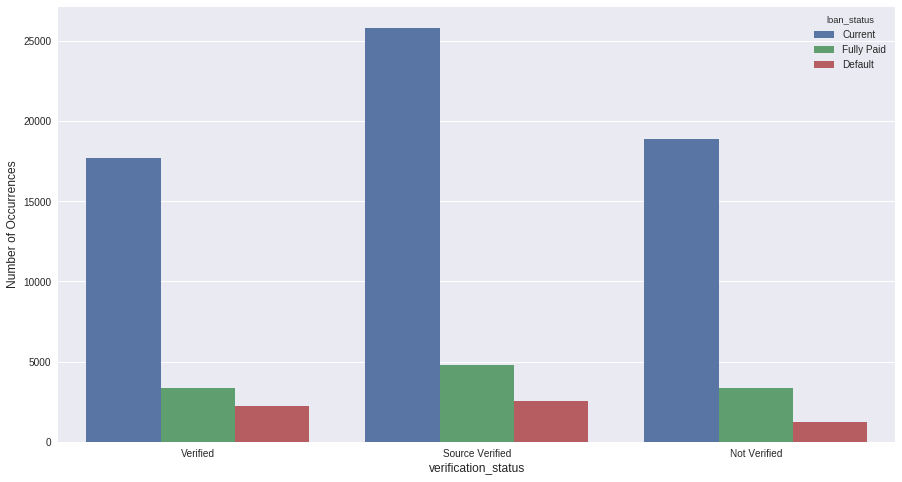

In [133]:
import seaborn as sns
plt.figure(figsize=(15,8))

sns.countplot(x="verification_status", hue='loan_status', data=df)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel("verification_status", fontsize=12)
plt.show()

In [112]:
X_cat = pd.get_dummies(df , columns=catFeatures)
y = X_cat['defaulted']
X_cat.drop("defaulted", inplace = True, axis =1 )

In [113]:
from sklearn.model_selection import train_test_split

X = X_cat.iloc[:, df.columns != 'defaulted']
## stratify is default 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2111)

In [114]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
X_rs = rs.fit_transform(X_train)
X_ts = rs.transform(X_test)

In [115]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
nbclf = GaussianNB()
nbclf.fit(X_rs, y_train)

print(nbclf)
# make predictions
y_p = nbclf.predict(X_ts)
scores = cross_val_score(nbclf, X_ts, y_test, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)\n" % (scores.mean(), scores.std() * 2))
print(metrics.classification_report(y_test, y_p))
print(metrics.confusion_matrix(y_test, y_p))

GaussianNB(priors=None)
[ 0.93002187  0.9425      0.9384375   0.9440625   0.94154423]
Accuracy: 0.94 (+/- 0.01)

             precision    recall  f1-score   support

          0       0.97      0.98      0.97     14791
          1       0.69      0.59      0.63      1209

avg / total       0.95      0.95      0.95     16000

[[14467   324]
 [  501   708]]


In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics as mt

rclf = RandomForestClassifier(n_estimators=700, random_state=2111, n_jobs=-1)
rclf.fit(X_train, y_train)
scores = cross_val_score(rclf, X_train, y_train, cv=5)
print(scores)

ypred = rclf.predict(X_test)


print("Accuracy: %0.2f (+/- %0.2f)\n" % (scores.mean(), scores.std() * 2))


print(mt.classification_report(y_test, ypred))
print(mt.confusion_matrix(y_test, ypred))

[ 0.95515975  0.95383173  0.95679687  0.95413704  0.95234003]
Accuracy: 0.95 (+/- 0.00)

             precision    recall  f1-score   support

          0       0.96      0.99      0.97     14791
          1       0.76      0.55      0.64      1209

avg / total       0.95      0.95      0.95     16000

[[14584   207]
 [  546   663]]


In [117]:
from imblearn.over_sampling import SMOTE
X_tsm, y_tsm = SMOTE().fit_sample(X_rs, y_train)

In [118]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
nbclf = GaussianNB()
nbclf.fit(X_tsm, y_tsm)

print(nbclf)
# make predictions
y_p = nbclf.predict(X_ts)
scores = cross_val_score(nbclf, X_ts, y_test, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)\n" % (scores.mean(), scores.std() * 2))
print(metrics.classification_report(y_test, y_p))
print(metrics.confusion_matrix(y_test, y_p))

GaussianNB(priors=None)
[ 0.93002187  0.9425      0.9384375   0.9440625   0.94154423]
Accuracy: 0.94 (+/- 0.01)

             precision    recall  f1-score   support

          0       0.98      0.92      0.95     14791
          1       0.45      0.77      0.57      1209

avg / total       0.94      0.91      0.92     16000

[[13638  1153]
 [  279   930]]


In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics as mt

rclf = RandomForestClassifier(n_estimators=700, random_state=2111, n_jobs=-1)
rclf.fit(X_tsm, y_tsm)
scores = cross_val_score(rclf,X_ts, y_test, cv=5)
print(scores)

ypred = rclf.predict(X_ts)
print("Accuracy: %0.2f (+/- %0.2f)\n" % (scores.mean(), scores.std() * 2))

[ 0.95720087  0.9521875   0.950625    0.9528125   0.95185996]
Accuracy: 0.95 (+/- 0.00)



In [120]:
print(mt.classification_report(y_test, ypred))
print(mt.confusion_matrix(y_test, ypred))

             precision    recall  f1-score   support

          0       0.97      0.97      0.97     14791
          1       0.67      0.66      0.67      1209

avg / total       0.95      0.95      0.95     16000

[[14400   391]
 [  409   800]]


Feature ranking:
1. feature loan_amnt (0.317538)
2. feature term (0.278497)
3. feature installment (0.050616)
4. feature emp_length (0.040324)
5. feature annual_inc (0.035362)
6. feature issue_d (0.035270)
7. feature dti (0.034015)
8. feature earliest_cr_line (0.027608)
9. feature fico_range_low (0.024004)
10. feature fico_range_high (0.022693)
11. feature last_credit_pull_d (0.022331)
12. feature last_fico_range_high (0.021611)
13. feature last_fico_range_low (0.020678)
14. feature delinq_amnt (0.019708)
15. feature delinq_2yrs (0.013417)
16. feature mths_since_last_delinq (0.013402)
17. feature inq_last_6mths (0.010657)
18. feature inq_last_12m (0.007045)
19. feature home_ownership_ANY (0.004883)
20. feature home_ownership_MORTGAGE (0.000341)
21. feature home_ownership_OWN (0.000000)


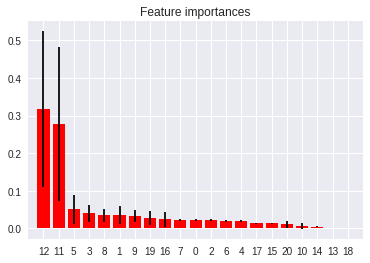

In [121]:
importances = rclf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rclf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X.columns[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [140]:
len(numFeatures[1:])


18

In [144]:
data_cor = X.corr()
# Set the threshold and add to pairs to list
t = 0.70
cor_list = []

#Find Pairs and update cor_list
for i in range(0,18):
    for j in range(i+1,18):
        if (data_cor.iloc[i,j] >= t and data_cor.iloc[i,j] < 1) or (data_cor.iloc[i,j] < 0 and data_cor.iloc[i,j] <= -t):
            cor_list.append([data_cor.iloc[i,j],i,j])

#Sort by corr coef
sorted_list = sorted(cor_list,key=lambda x: -abs(x[0]))

for v,i,j in sorted_list:
    print ("%s and %s = %.5f" % (numFeatures[1:][i],numFeatures[1:][j],v))

fico_range_low and fico_range_high = 1.00000
term and installment = 0.94375
last_fico_range_high and last_fico_range_low = 0.87421


In [147]:
X_norm = (X_norm - X_norm.min())/(X_norm.max() - X_norm.min())


In [152]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
trnsf = scaler.transform(X)

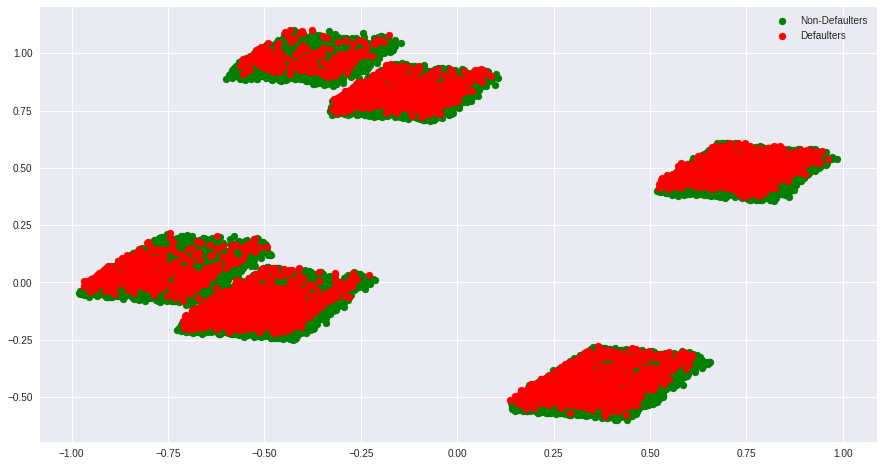

In [153]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
plt.figure(figsize=(15,8))

pca = PCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(trnsf))
plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Non-Defaulters', c='green')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Defaulters', c='red')

plt.legend()
plt.show()